In [1]:
import numpy as np
import matplotlib.pyplot as plt
from analysis.utils import *
from analysis.ornt import *
from tqdm.notebook import tqdm

In [2]:
import seaborn as sns
custom_params = {"axes.spines.right": False, "axes.spines.top": False}
sns.set_theme(style="ticks", rc=custom_params)

import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42

In [3]:
roi = 'V2_V3'
sub = 'TW'
model_type = 'avg'

# use cpu or gpu as device
device = 'cuda' if torch.cuda.is_available() else 'cpu'

In [4]:
all_stim = []
all_esti = []

cond_idx = 1

# load data
stim, beta = load_data('ORNT_' + sub, model_type, roi)
stimulus = stim[cond_idx]
response = beta[cond_idx].T

decode_stim, decode_esti, _ = cv_decode(stimulus, response,
                    batchSize=20, device=device, pbar=False)

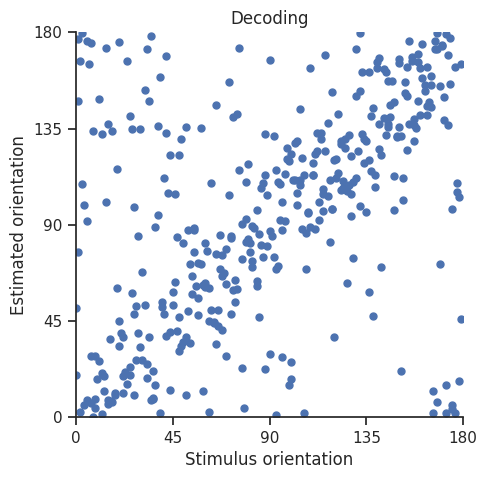

In [5]:
fig = plt.figure(figsize=(5, 5))

plt.plot(decode_stim, decode_esti, 'o', markersize=5)
plt.xlim([0, 180])
plt.ylim([0, 180])
plt.xticks([0, 45, 90, 135, 180])
plt.yticks([0, 45, 90, 135, 180])

plt.xlabel('Stimulus orientation')
plt.ylabel('Estimated orientation')

plt.title('Decoding')
plt.show()